In [1]:
import pandas as pd
import numpy as np

names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                header=None, names=names , delim_whitespace = True, na_values='?')

df.head(5)



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
print(df.shape)

(506, 14)


In [0]:
y = df['PRICE'].values
x = df['RM'].values



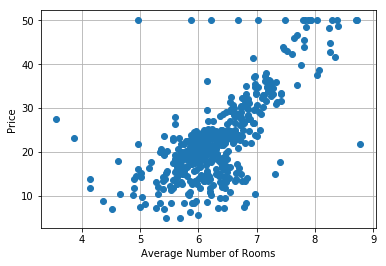

In [4]:
import matplotlib.pyplot as plt

plt.plot(x,y,'o')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Price')
plt.grid()

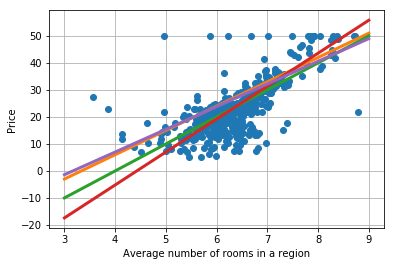

In [5]:
w = 9
b = -30
xplt = np.linspace(3,9,100)
yplt = w*xplt + b
plt.plot(x,y,'o')    # Plot the data points

plt.plot(xplt,yplt,'-',linewidth=3)  # Plot the line
plt.xlabel('Average number of rooms in a region')
plt.ylabel('Price')
plt.grid()

## A few lines students have came up with
yplt2 = 10*xplt - 40
plt.plot(xplt,yplt2,'-',linewidth=3) 

yplt3 = 12.2*xplt - 54
plt.plot(xplt,yplt3,'-',linewidth=3) 

yplt4 = 8.4*(xplt - 4) + 7
plt.plot(xplt,yplt4,'-',linewidth=3) 

Calculate the Mean Squared Error (MSE) to determine goodness of fit

In [6]:
yhat = 9*x-30
MSE = np.mean((y-yhat)**2)
yhat2 = 12.2*x-54
MSE2 = np.mean((y-yhat2)**2)
print(MSE)
print(MSE2)

59.83774942094861
48.34843803059288


In [7]:
## Mean Aboslute Error
print(np.mean(np.abs(y-yhat)))

5.807100790513834


### Calculate the Least Square Solution

w=  9.102108981180308 b=  -34.670620776438554
MSE:  43.60055177116956
Root MSE:  6.603071389222561


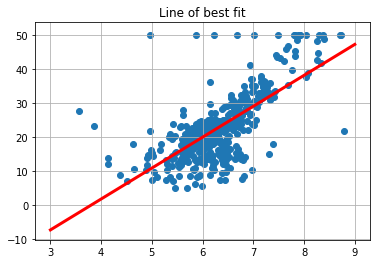

In [8]:
meanx = np.mean(x)
meany = np.mean(y)
varx = np.var(x)
vary = np.var(y)
covxy = np.mean((x-meanx)*(y-meany))
corrxy = covxy/(np.sqrt(varx)*np.sqrt(vary))

w = corrxy * (np.sqrt(vary)/np.sqrt(varx))
b = meany - w*meanx
print('w= ',w,'b= ',b)

x_new = np.linspace(3,9,100)
y_new = b + w*x_new

plt.plot(x_new,y_new, c='red', linewidth = 3)
plt.scatter(x,y)
plt.grid()
plt.title('Line of best fit')

yhat = b + w*x
MSE = np.mean((y - yhat)**2)
print('MSE: ', MSE)
print('Root MSE: ', np.sqrt(MSE))


### Use sklearn to perform the linear regression

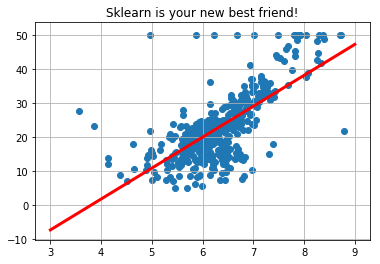

In [9]:
## Results in the same line as the previous section
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1),y.reshape(-1,1))

y_new = regr.predict(x_new.reshape(-1,1))
plt.figure()
plt.plot(x_new,y_new, c='red', linewidth = 3)
plt.scatter(x,y)
plt.grid()
plt.title('Sklearn is your new best friend!');